<a href="https://colab.research.google.com/github/143biswajit/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# **IMPORTING LIBRABARY & DATASET**

In [1]:
#Importing Librabary for python data manipulation
import pandas as pd
import numpy as np

#Import librabary for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing librabary for data type Transfermation
from datetime import datetime
import datetime as dt

# Importing Librabary for data Encoding
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

#Importing Librabary for machinelearing Regression Implementain
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#Importing Librabry for Make Ml model simple and acurate
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# from vecstack import stacking

#Importing Librabary for evaluation of model
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# 'Statsmodels' is used to explore data, estimate statistical models, and perform statistical tests
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Avoding the worning
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/ALMABETTER  /HEALTH INSURANCE CROSS SELL PREDICTION-BISWAJIT GOCHHAYAT/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


**Making A DEEP COPY:**

In [4]:
# making a deep copy of our orginal data set
df = data.copy()

**DATA INSPECTION:**

**lets! see how our data set look like: **

In [5]:
# checking the 1st 5 lines of our data set for batter understanding.
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


**Data set shape**

In [6]:
# printing the shape of data shape
print('row = ',df.shape[0])
print('column = ',df.shape[1])
print("*"*50)
print('no of data = ',df.size)

row =  381109
column =  12
**************************************************
no of data =  4573308


In [7]:
#Getting all the columns
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

**Column information & Data Types**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
# unique values
df.nunique()


id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

**All Data Description**

In [10]:
# transposing the description of our all numerical data for better understanding
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


**HANDLING MISSING VALUE:**

**Null Value Inception**

In [11]:
null = df.isna().sum().sort_values(ascending = False)
null

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
# Drop the column
df.drop(['id'],inplace=True,axis = 1)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [14]:

#How many uinque items are present in our data set in each columns:
for i in df:
  a = df[i].nunique()   
  if df[i].nunique() >=4:
    print(i, 'has' , a ,'unique value')
    print("*"*50)

  else :
    print(i, 'has' ,a, 'unique values and those are\n',df[i].value_counts())
    print("*"*50)

Gender has 2 unique values and those are
 Male      206089
Female    175020
Name: Gender, dtype: int64
**************************************************
Age has 66 unique value
**************************************************
Driving_License has 2 unique values and those are
 1    380297
0       812
Name: Driving_License, dtype: int64
**************************************************
Region_Code has 53 unique value
**************************************************
Previously_Insured has 2 unique values and those are
 0    206481
1    174628
Name: Previously_Insured, dtype: int64
**************************************************
Vehicle_Age has 3 unique values and those are
 1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64
**************************************************
Vehicle_Damage has 2 unique values and those are
 Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64
**************************************************
Annu

##<b>Feature Engg:

In [15]:
##Classifying the data into categorical and numerical data
categorical_data = []
numerical_data = []
for col in df.columns:
    unique_values = len(df[col].unique())
    if unique_values < 4:
        categorical_data.append(col)
    else:
        numerical_data.append(col)

In [16]:
for x in categorical_data:
        ("{} : {} values".format(x, df[x].unique()))
# print('**'*50)
for x in numerical_data:
        ("{} : {} values".format(x, df[x].unique()))

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Vehicle_Age = le.fit_transform(df.Vehicle_Age)
df.Vehicle_Damage = le.fit_transform(df.Vehicle_Damage)

In [18]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


**OVERVIEW**

Dataset statistics

Number of rows:2000

Number of columns:21

Missing values:0

Missing values (%):0%

Checking Duplicate values: 0



---



---



---



# **EDA**

# **Univariant Analysis:**

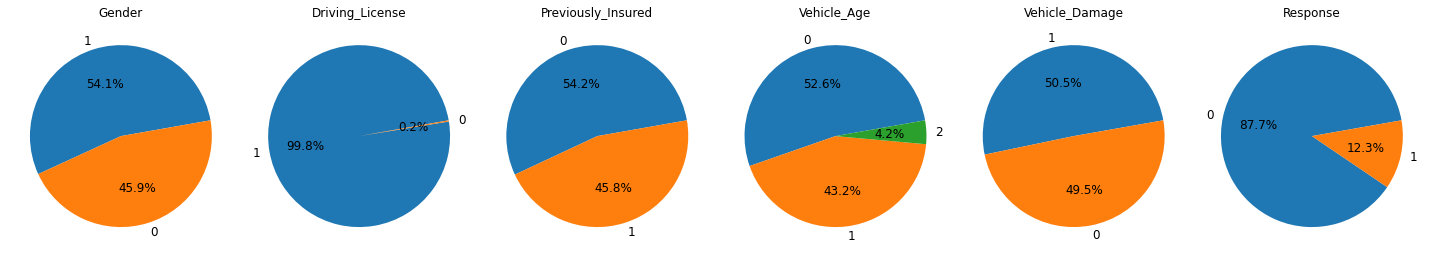

In [19]:
#making pie chart for all catagorical type varibale
fig, axes = plt.subplots(1, 6, figsize=(20, 20))
for i, c in enumerate(df[categorical_data]):
  df[c].value_counts().plot(kind = 'pie', ax=axes[i], title=c, autopct='%1.1f%%', fontsize=12,startangle=10)
  axes[i].set_ylabel('')    
  plt.tight_layout()

##<b>OBSERVATION:
                           # male-1   female-2
                           # Vehicle_Age  >2 =2  , 1-2 = 0   , <1 = 1
                           # Vehicle_Damage 1 = yes   , 0= no
1. 54.1% of male and 45.9% of female are present in cross sell data set
2. 99.8% of peoples have their own dl
3. more than 50% people have note their insurance
4. 52.6% of vichiles are in between 1 to2 years.
5. The ratio damage vichiles and non damge vichesl are aproximatels same
6. 87.6 % of peoples are not shown their intrest on response of insurance.

In [20]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

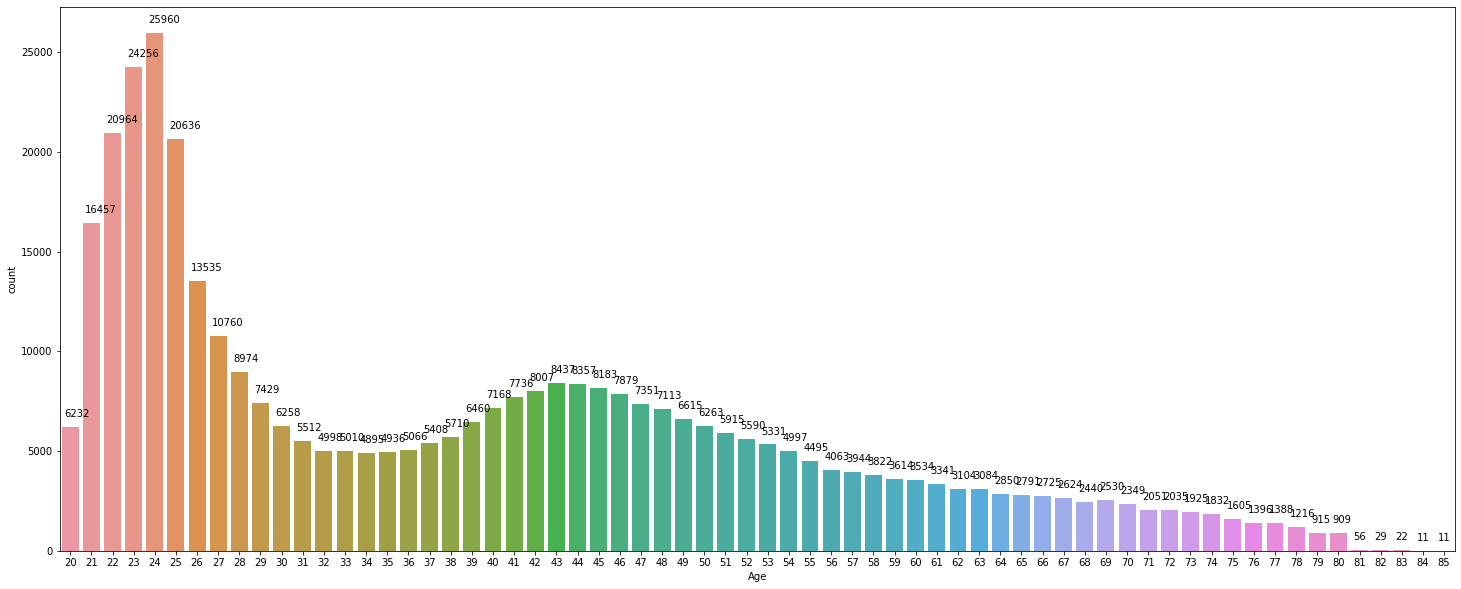

In [21]:
from seaborn.categorical import countplot
plt.figure(figsize  = (25,10))
ax = countplot(x = 'Age' ,data= df )
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.1, p.get_height()+500))

##<b>2.Which age of costomer have more frequent in dataset ?

Text(0, 0.5, 'count of people of ages')

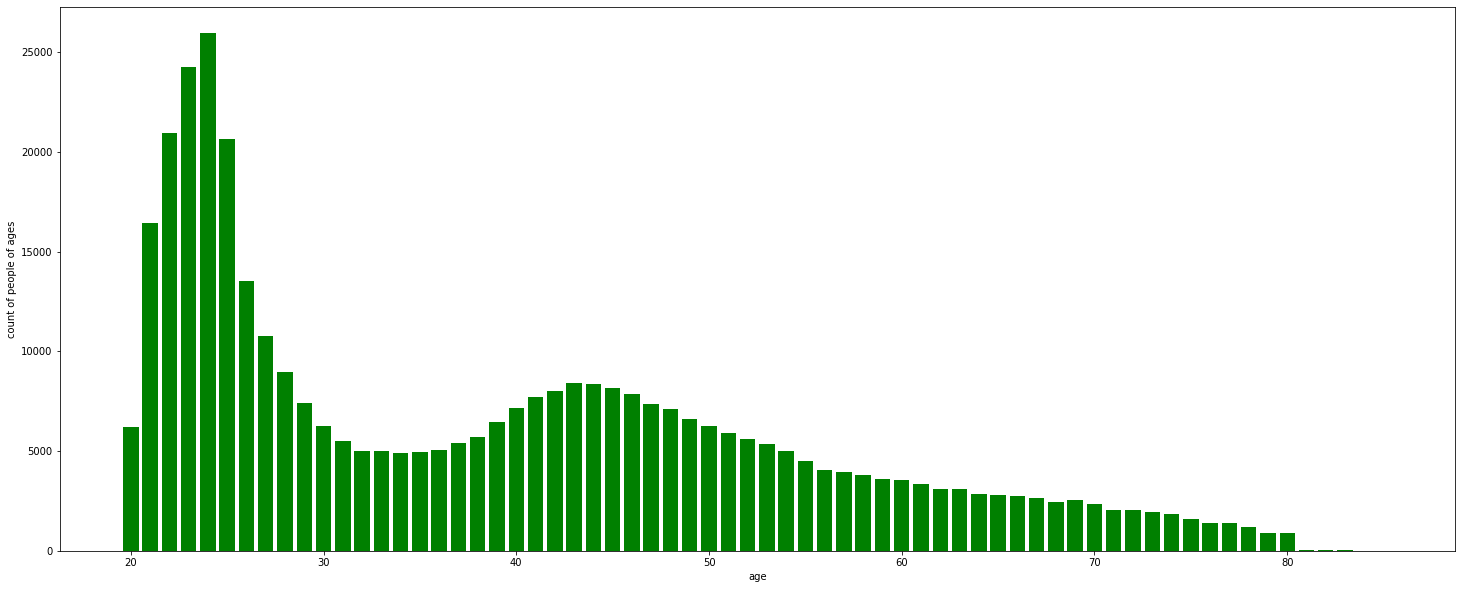

In [22]:
age =df['Age'].value_counts().index
no_of_age =df['Age'].value_counts()
plt.rcParams['figure.figsize'] = (25, 10)
plt.bar(age,no_of_age,color = 'green')
plt.xlabel("age")
plt.ylabel("count of people of ages")

Text(0, 0.5, 'count of people of ages')

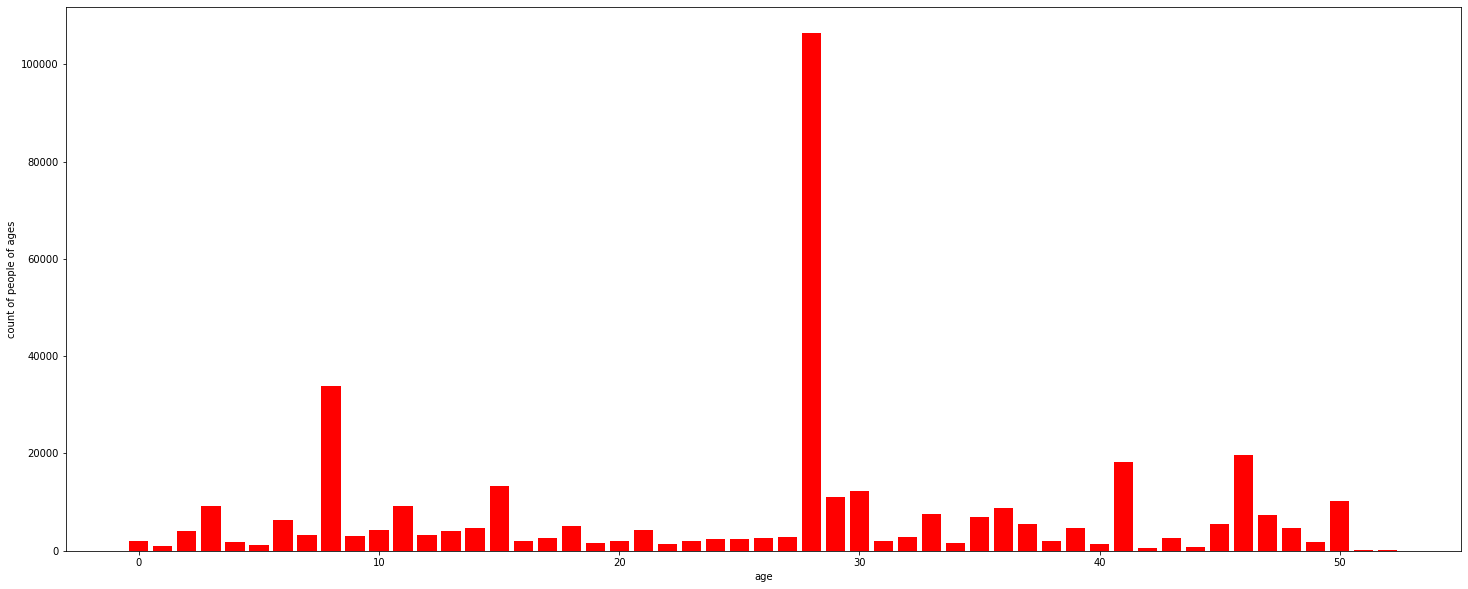

In [23]:
Region_Code =df['Region_Code'].value_counts().index
no_of_age =df['Region_Code'].value_counts()
plt.rcParams['figure.figsize'] = (25, 10)
plt.bar(Region_Code,no_of_age,color = 'red')
plt.xlabel("age")
plt.ylabel("count of people of ages")

In [24]:
df['Policy_Sales_Channel'].nunique()


155

Text(0, 0.5, 'count of people of ages')

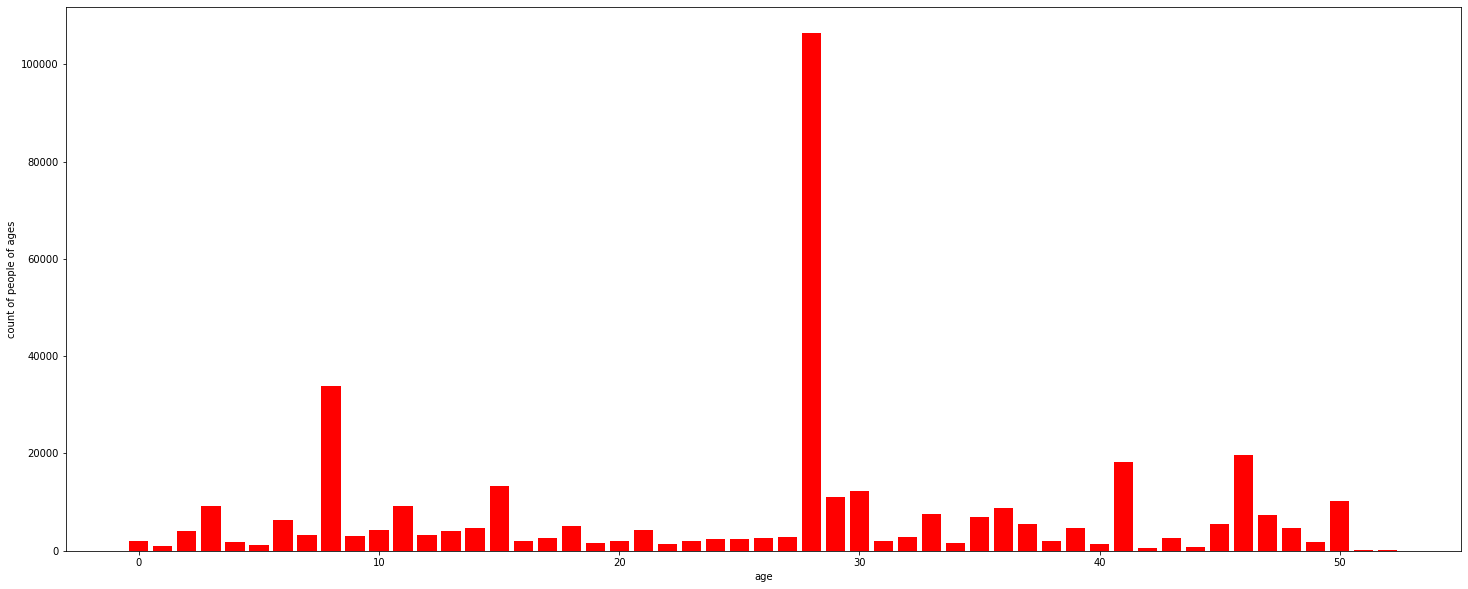

In [25]:
Region_Code =df['Region_Code'].value_counts().index
no_of_age =df['Region_Code'].value_counts()
plt.rcParams['figure.figsize'] = (25, 10)
plt.bar(Region_Code,no_of_age,color = 'red')
plt.xlabel("age")
plt.ylabel("count of people of ages")

Text(0, 0.5, 'count of people of ages')

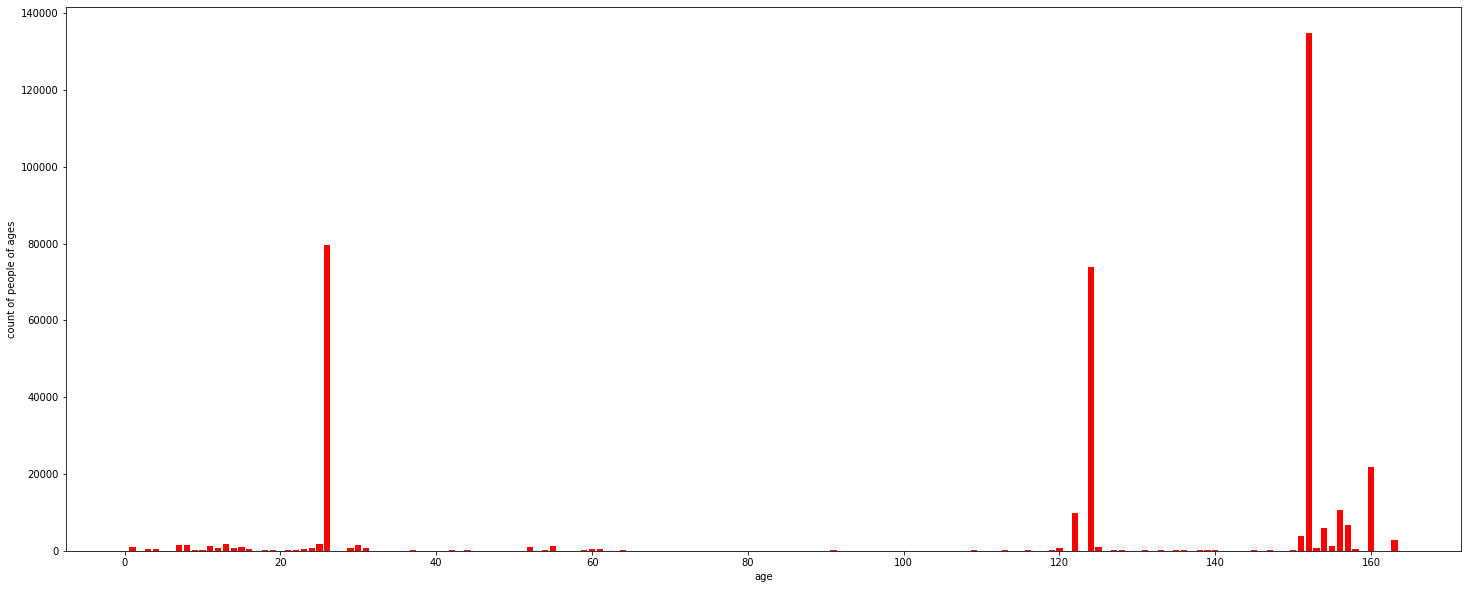

In [26]:
a =df['Policy_Sales_Channel'].value_counts().index
b =df['Policy_Sales_Channel'].value_counts()
plt.rcParams['figure.figsize'] = (25, 10)
plt.bar(a,b,color = 'red')
plt.xlabel("age")
plt.ylabel("count of people of ages")

In [27]:
a = df.groupby(["Age"])["Gender"].agg(["value_counts"]).iloc[:5]
a

value_counts
Age Gender              
20  0               3300
    1               2932
21  0               8954
    1               7503
22  0              11767

In [28]:
#  
ab = df.groupby('Region_Code')['Previously_Insured'].count().head(10).reset_index().sort_values(by='Previously_Insured',ascending=False)
print(ab)

   Region_Code  Previously_Insured
8          8.0               33877
3          3.0                9251
6          6.0                6280
2          2.0                4038
7          7.0                3279
9          9.0                3101
0          0.0                2021
4          4.0                1801
5          5.0                1279
1          1.0                1008


Text(0, 0.5, ' Previously_Insured ')

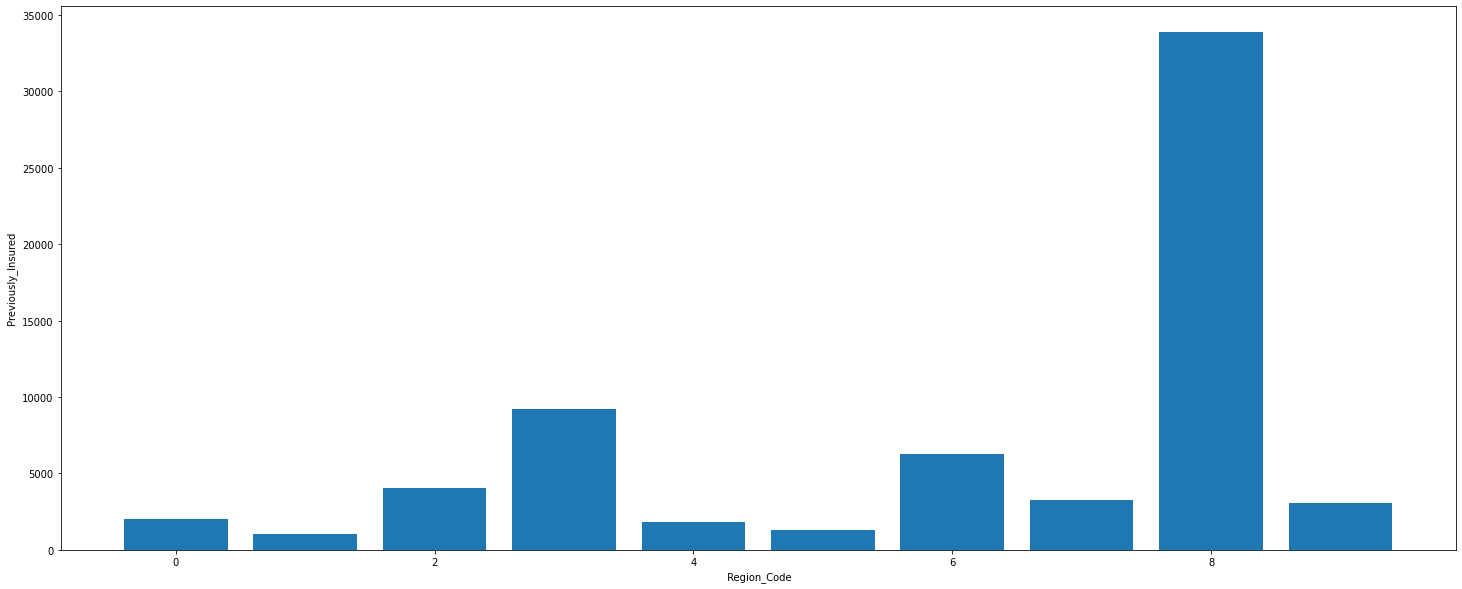

In [29]:
code = ab.loc[:,'Region_Code']
insured = ab.loc[:,'Previously_Insured']
plt.bar(code,insured)
plt.xlabel(" Region_Code")
plt.ylabel(" Previously_Insured ")

In [30]:
#  
ab = df.groupby('Vehicle_Age')['Previously_Insured'].count().reset_index().sort_values(by='Previously_Insured',ascending=False)
print(ab)

   Vehicle_Age  Previously_Insured
0            0              200316
1            1              164786
2            2               16007


Text(0, 0.5, ' Previously_Insured ')

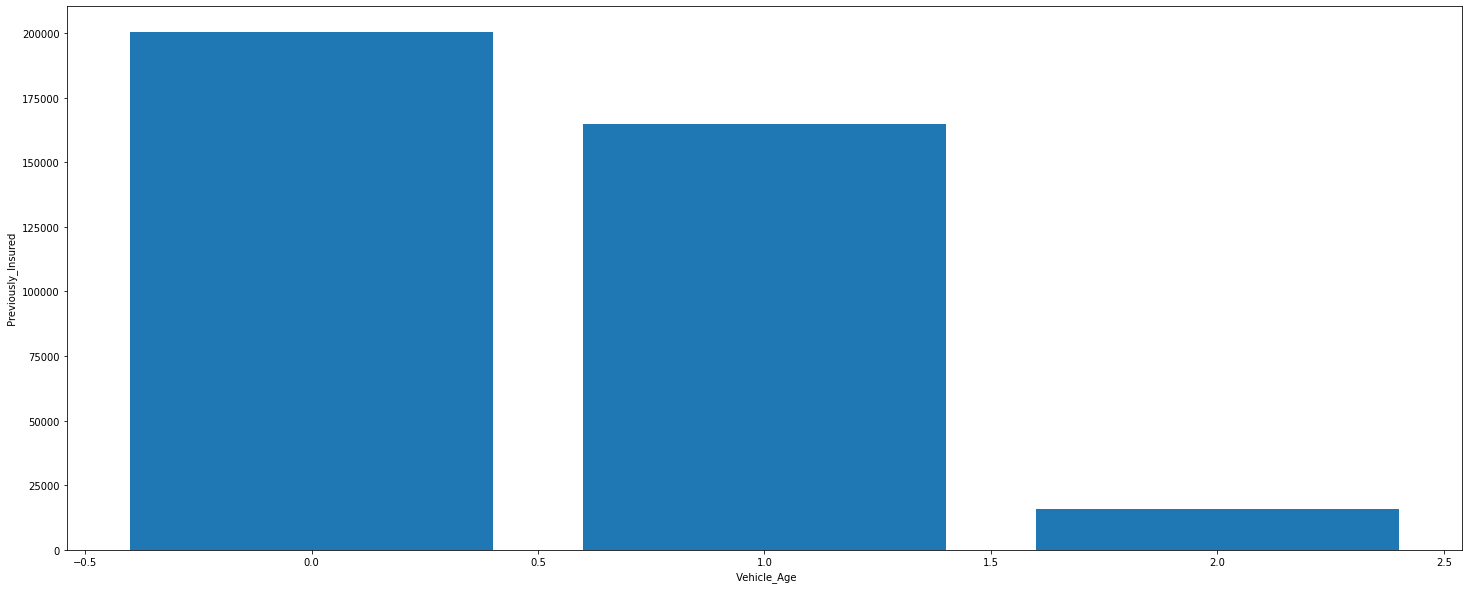

In [31]:
code = ab.loc[:,'Vehicle_Age']
insured = ab.loc[:,'Previously_Insured']
plt.bar(code,insured)
plt.xlabel(" Vehicle_Age")
plt.ylabel(" Previously_Insured ")

In [32]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [33]:
#  
ab = df.groupby('Vehicle_Age')['Vehicle_Damage'].count().reset_index().sort_values(by='Vehicle_Damage',ascending=False)
ab

,Vehicle_Age,Vehicle_Damage
0,0,200316
1,1,164786
2,2,16007


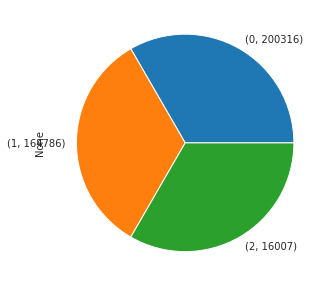

In [34]:
# Percentage of hotels present in our data set
sns.set_style('whitegrid')
plot = ab.value_counts().plot.pie(figsize=(5,5))

In [35]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [36]:
#  
ab = df.groupby('Age')['Vintage'].count().head(10).reset_index().sort_values(by='Vintage',ascending=False)
ab

,Age,Vintage
4,24,25960
3,23,24256
2,22,20964
5,25,20636
1,21,16457
6,26,13535
7,27,10760
8,28,8974
9,29,7429
0,20,6232


Text(0, 0.5, ' Previously_Insured ')

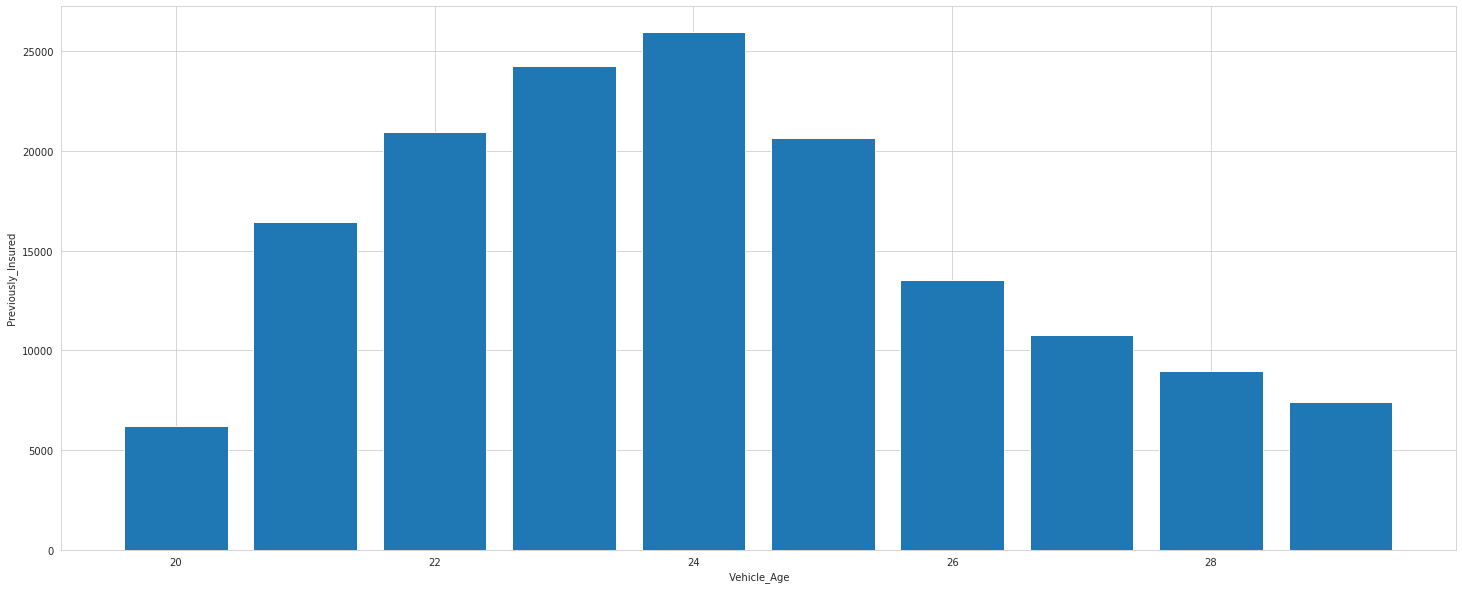

In [37]:
code = ab.loc[:,'Age']
insured = ab.loc[:,'Vintage']
plt.bar(code,insured)
plt.xlabel(" Vehicle_Age")
plt.ylabel(" Previously_Insured ")

In [38]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [39]:
ab=df.groupby('Region_Code')['Policy_Sales_Channel'].count().head(10).reset_index().sort_values(by='Policy_Sales_Channel',ascending=False)
ab

,Region_Code,Policy_Sales_Channel
8,8.0,33877
3,3.0,9251
6,6.0,6280
2,2.0,4038
7,7.0,3279
9,9.0,3101
0,0.0,2021
4,4.0,1801
5,5.0,1279
1,1.0,1008


In [40]:
df['Policy_Sales_Channel'].unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

In [41]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
